#**Assignment : 2 (Exploratory Data Analysis)**

**Instructions:**

* Submit your assignment through Google Classroom by the deadline. Late submissions will not be accepted.

* Submit your code as a single **Jupyter/Google Colab notebook**, following the filename format: e.g., **21L-1234.ipynb**. Ensure the notebook includes clear and **visible outputs** for each question.


* Any form of academic dishonesty (e.g. **plagiarism**, copying code from other sources, **sharing code**  with other students and blindly generating code from any form of **AI**) is strictly prohibited and will result in serious penalty.



#**Summary Statistics**

Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, mode, minimum, maximum, variance and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

**1.** A **Sales** DataFrame is provided, and you need to print the mean and median of all numerical columns.

In [ ]:
import pandas as pd

Sales = pd.read_csv('Sales.csv')

# Print mean of numerical columns
print("Mean of numerical columns:")
print(Sales.select_dtypes(include=['int64', 'float64']).mean())
print("\nMedian of numerical columns:")
print(Sales.select_dtypes(include=['int64', 'float64']).median())

Mean of numerical columns:
store                      15.441897
department                 45.218118
weekly_sales            23843.950149
temperature_c              15.731978
fuel_price_usd_per_l        0.749746
unemployment                8.082009
dtype: float64

Median of numerical columns:
store                      13.000000
department                 40.000000
weekly_sales            12049.065000
temperature_c              16.966667
fuel_price_usd_per_l        0.743381
unemployment                8.099000
dtype: float64


**2.** Print the maximum and minimum of the **date** column.

In [6]:
from datetime import datetime

Sales['date'] = pd.to_datetime(Sales['date'])

print("Latest date in Sales data:", max(Sales['date']))
print("Earliest date in Sales data:", min(Sales['date']))

Latest date in Sales data: 2012-10-26 00:00:00
Earliest date in Sales data: 2010-02-05 00:00:00


**3.** Take subset for type **A** stores, and calculate their total weekly sales.

In [16]:
type_A_sales = Sales[Sales['type'] == 'A']['weekly_sales'].sum()
print(f"Total weekly sales for type A stores: ${type_A_sales:,.2f}")

print(len(Sales[Sales['type'] == 'A']))
type_A_sales_shuffled = Sales[Sales['type'] == 'A'].sample(frac=.1)
print(len(type_A_sales_shuffled))
print(f'Total weekly sales from shuffled subset (.1 percent) of type A stores: ${type_A_sales_shuffled["weekly_sales"].sum():,.2f}')

Total weekly sales for type A stores: $233,716,315.01
9872
987
Total weekly sales from shuffled subset (.1 percent) of type A stores: $23,370,871.63


**4.**
Print the variance and standard deviation of the **weekly_sales** column using `.agg()`.

In [ ]:
stats = Sales['weekly_sales'].agg(['var', 'std'])
print("Weekly Sales Statistics:")
print(f"Variance: ${stats['var']:,.2f}")
print(f"Standard Deviation: ${stats['std']:,.2f}")

Weekly Sales Statistics:
Variance: $913,271,824.09
Standard Deviation: $30,220.39


**5.**  Create a custom **IQR** function using `.agg()` to print the IQR of the **temperature_c**, **fuel_price_usd_per_l**, and **unemployment** columns.

In [18]:
def iqr(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    return Q3 - Q1

# Calculate IQR for specified columns
columns_to_analyze = ['temperature_c', 'fuel_price_usd_per_l', 'unemployment']
iqr_stats = Sales[columns_to_analyze].agg(iqr)

print("Interquartile Range (IQR) for columns:")
for col in columns_to_analyze:
    print(f"{col}: {iqr_stats[col]:.4f}")

Interquartile Range (IQR) for columns:
temperature_c: 16.5833
fuel_price_usd_per_l: 0.0732
unemployment: 0.5650


**6.** Group by the **store** column and print the total **weekly sales** for each store.

In [19]:
store_sales = Sales.groupby('store')['weekly_sales'].sum()
print("Total weekly sales by store:")
print(store_sales.to_string(float_format=lambda x: '${:,.2f}'.format(x)))

Total weekly sales by store:
store
1    $18,828,144.55
2    $23,786,139.34
4    $23,540,414.45
6    $19,275,700.71
10   $23,178,403.89
13   $23,431,368.47
14   $26,889,842.67
19   $18,057,339.37
20   $25,828,317.41
27   $21,786,727.24
31   $16,179,249.68
39   $16,113,071.12


#**Data Visualization**
You will work with a **Job Seekers** Dataset, containing information about job seekers and their profiles.

Your tasks will involve:

**Univariate Analysis:** Analyze the distribution of individual variables.

**Bivariate Analysis:** Explore the relationships between two variables.

The dataset contains the following columns:

- **enrollee_id**: Unique ID for each enrollee.
- **city**: Code of the city the enrollee is from.
- **city_development_index**: Development index score of the city.
- **gender**: Gender of the enrollee.
- **relevent_experience**: Whether the enrollee has relevant work experience.
- **enrolled_university**: The type of university enrollment (if any).
- **education_level**: Highest education level of the enrollee.
- **major_discipline**: Main discipline studied.
- **experience**: Total years of work experience.
- **company_size**: Size of the company the enrollee works for.
- **company_type**: Type of company.
- **last_new_job**: The time since the last job change.
- **training_hours**: Total number of training hours completed.
- **target**: Whether the enrollee is looking for a job change (1 = Yes, 0 = No).

###**Univariate Analysis:**

**1. Histograms:**


* Create a histogram for the **city_development_index** to understand its distribution across different values.
* Create a histogram for **training_hours** to visualize how training hours are distributed among the enrollee population.

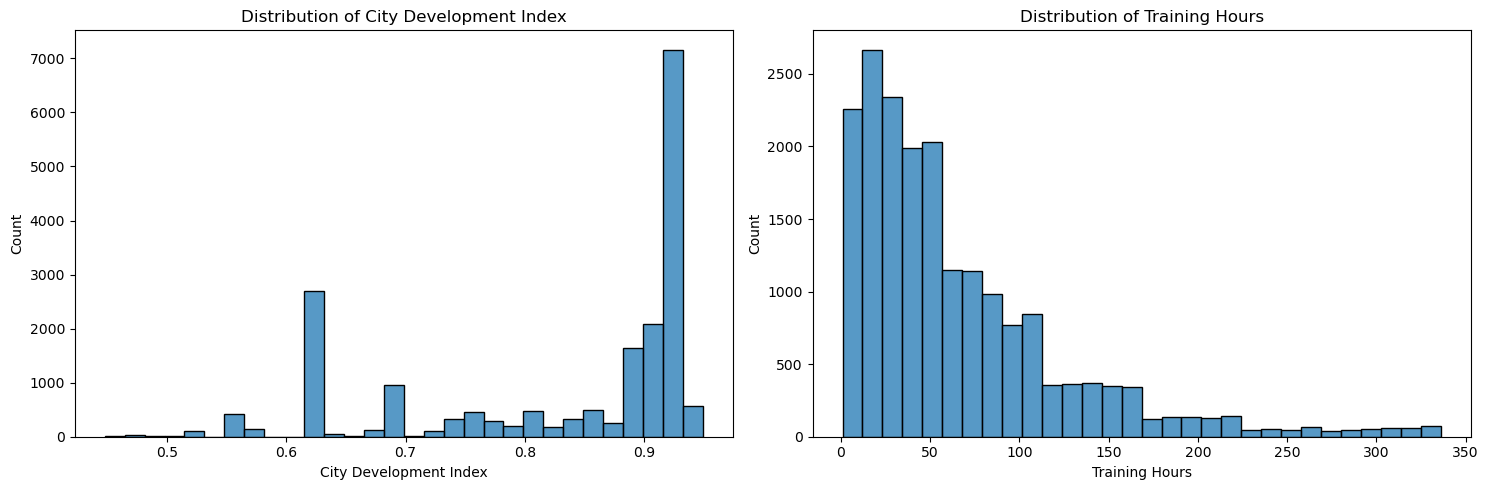

In [21]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Set style for better visualization
# plt.style.use('seaborn')

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot histogram for city_development_index
df_jobs = pd.read_csv('Job_Seekers.csv')
sns.histplot(data=df_jobs, x='city_development_index', bins=30, ax=ax1)
ax1.set_title('Distribution of City Development Index')
ax1.set_xlabel('City Development Index')
ax1.set_ylabel('Count')

# Plot histogram for training_hours
sns.histplot(data=df_jobs, x='training_hours', bins=30, ax=ax2)
ax2.set_title('Distribution of Training Hours')
ax2.set_xlabel('Training Hours')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

**2. Bar Charts:**

* Create a bar chart for **gender** to visualize the number of enrollee males and females in the dataset.
* Create a bar chart for **education_level** to explore the distribution of enrollee education levels across different categories.

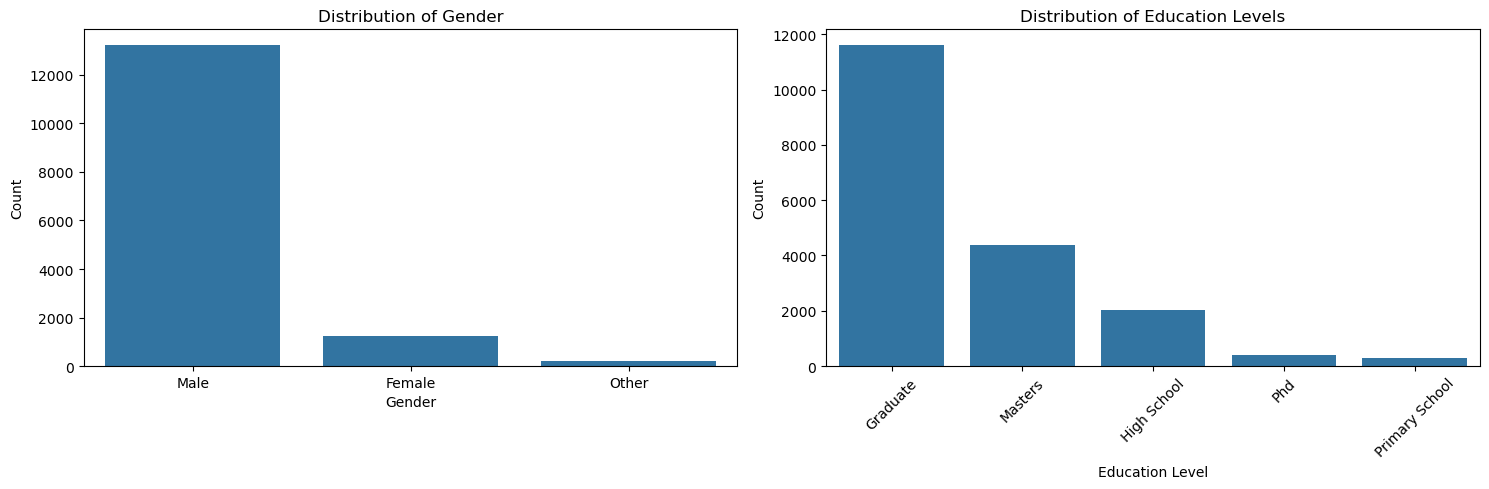

In [22]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart for gender distribution
gender_counts = df_jobs['gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax1)
ax1.set_title('Distribution of Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

# Bar chart for education level distribution
education_counts = df_jobs['education_level'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values, ax=ax2)
ax2.set_title('Distribution of Education Levels')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**3. Boxplots:**


Use boxplots to check for outliers in the numeric variables:
* city_development_index
* training_hours

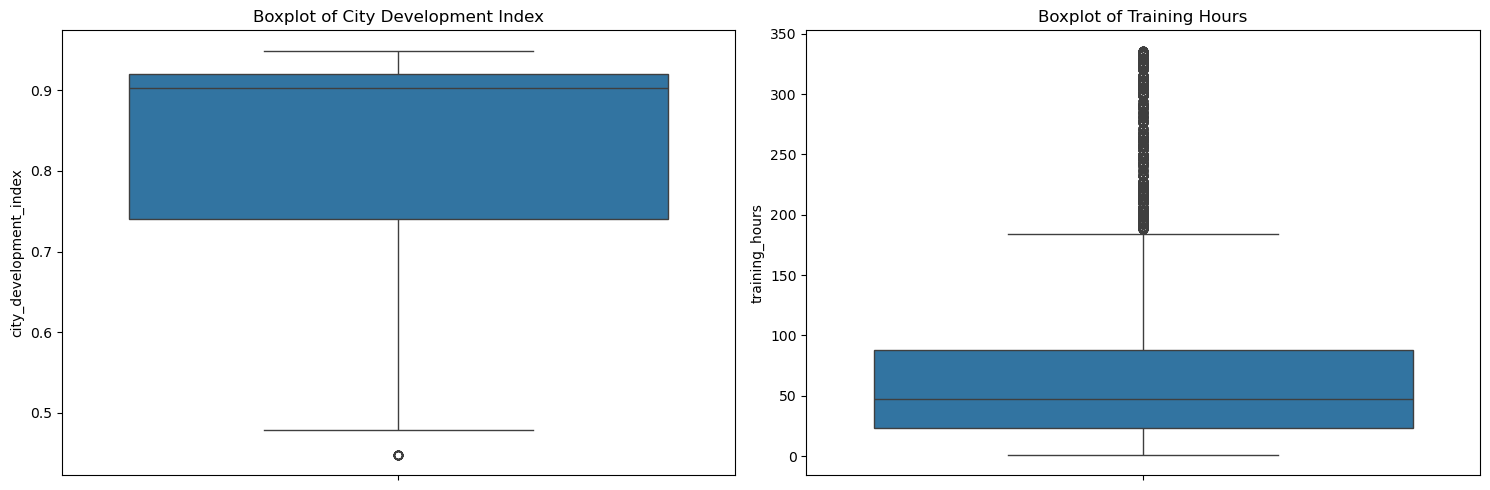

In [23]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot for city_development_index
sns.boxplot(data=df_jobs, y='city_development_index', ax=ax1)
ax1.set_title('Boxplot of City Development Index')

# Boxplot for training_hours
sns.boxplot(data=df_jobs, y='training_hours', ax=ax2)
ax2.set_title('Boxplot of Training Hours')

plt.tight_layout()
plt.show()

**4. Line Charts:**

* Create a line chart for **major_discipline** to visualize the trend in the number of enrollees across different disciplines over time or another continuous variable (if applicable).
* Create a line chart for **company_size** to explore the trend in the number of enrollees based on different company size categories over time or another continuous variable (if applicable).

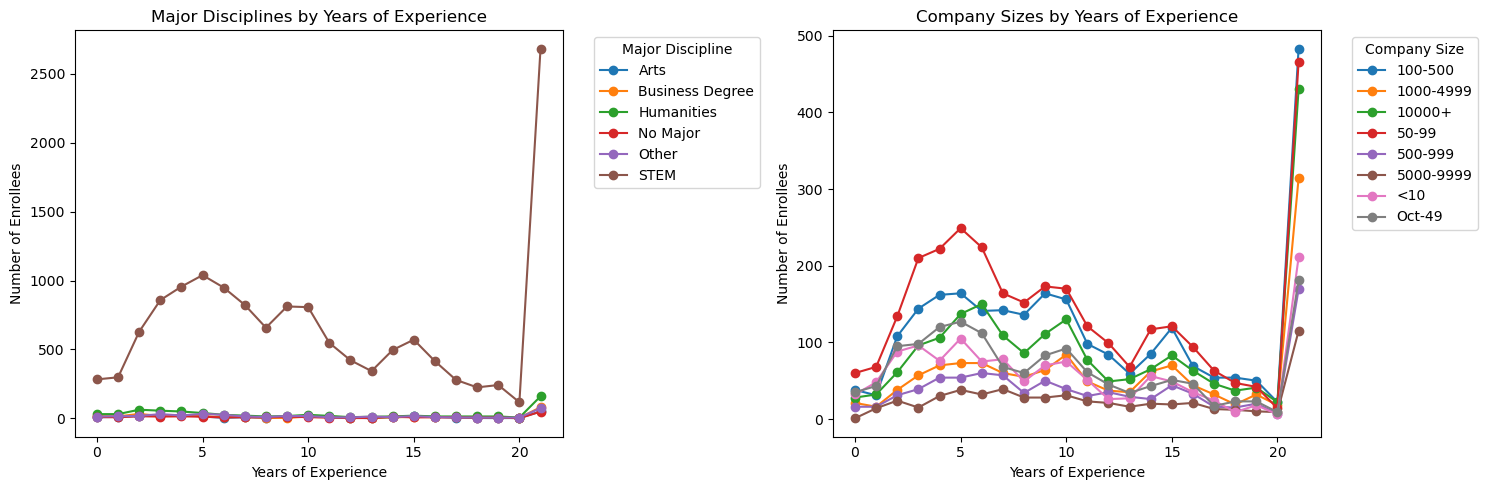

In [24]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Line chart for major_discipline
discipline_by_exp = df_jobs.groupby(['experience', 'major_discipline']).size().unstack()
discipline_by_exp.plot(ax=ax1, marker='o')
ax1.set_title('Major Disciplines by Years of Experience')
ax1.set_xlabel('Years of Experience')
ax1.set_ylabel('Number of Enrollees')
ax1.legend(title='Major Discipline', bbox_to_anchor=(1.05, 1), loc='upper left')

# Line chart for company_size
size_by_exp = df_jobs.groupby(['experience', 'company_size']).size().unstack()
size_by_exp.plot(ax=ax2, marker='o')
ax2.set_title('Company Sizes by Years of Experience')
ax2.set_xlabel('Years of Experience')
ax2.set_ylabel('Number of Enrollees')
ax2.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**5. Pie Chart:**

* Create a pie chart for **gender** to visualize the proportion of male and female enrollee categories in the dataset.
* Create a pie chart for **company_type** to explore the distribution of different types of companies where the enrollee has worked.

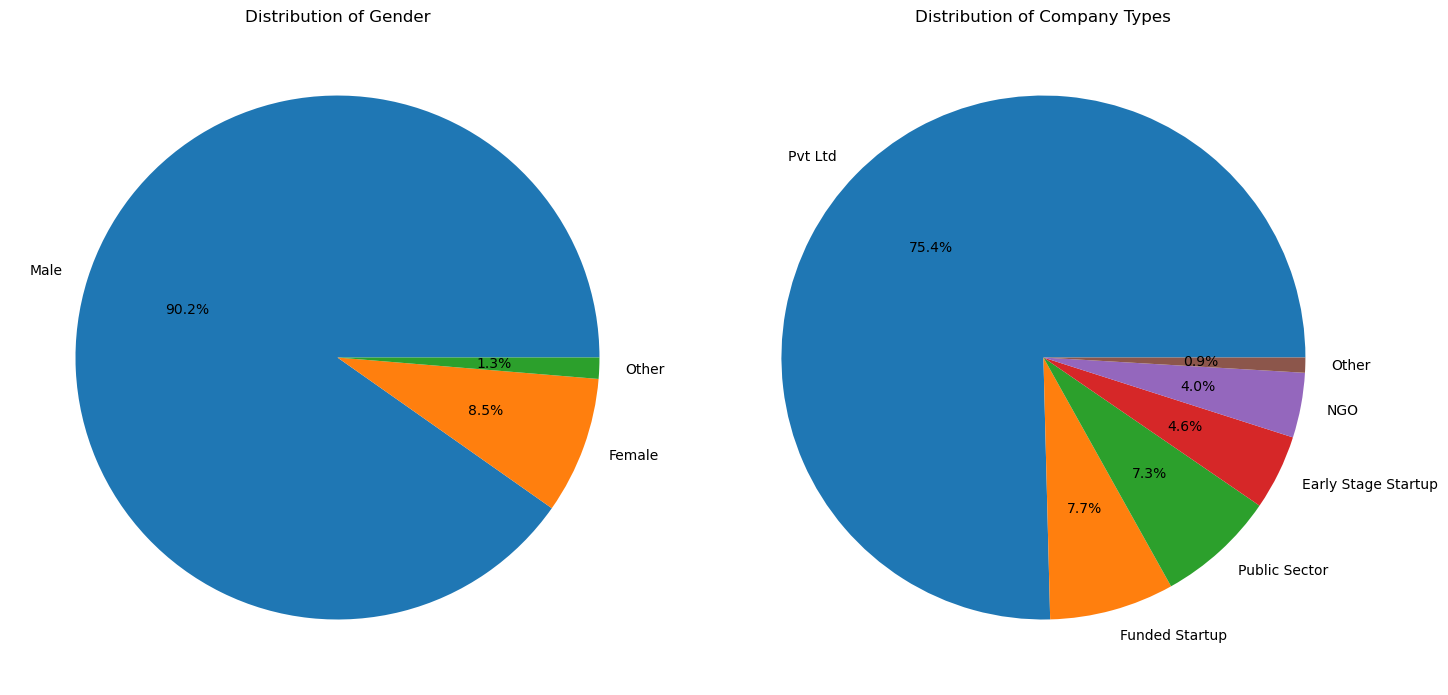

In [25]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Pie chart for gender distribution
gender_counts = df_jobs['gender'].value_counts()
ax1.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribution of Gender')

# Pie chart for company type distribution
company_type_counts = df_jobs['company_type'].value_counts()
ax2.pie(company_type_counts.values, labels=company_type_counts.index, autopct='%1.1f%%')
ax2.set_title('Distribution of Company Types')

plt.tight_layout()
plt.show()

###**Bivariate Analysis:**

**1. Scatter Plots:**

Analyze the relationship between **experience** and **city_development_index**.

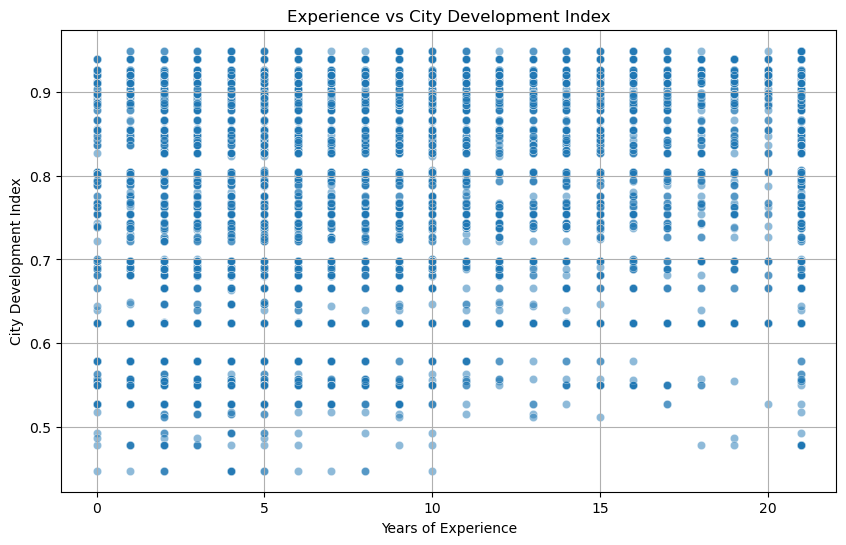

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_jobs, x='experience', y='city_development_index', alpha=0.5)
plt.title('Experience vs City Development Index')
plt.xlabel('Years of Experience')
plt.ylabel('City Development Index')
plt.grid(True)
plt.show()

**2. Boxplots:**

Create a boxplot for **city_development_index** grouped by **company_size** to examine how the development index varies across different company sizes.

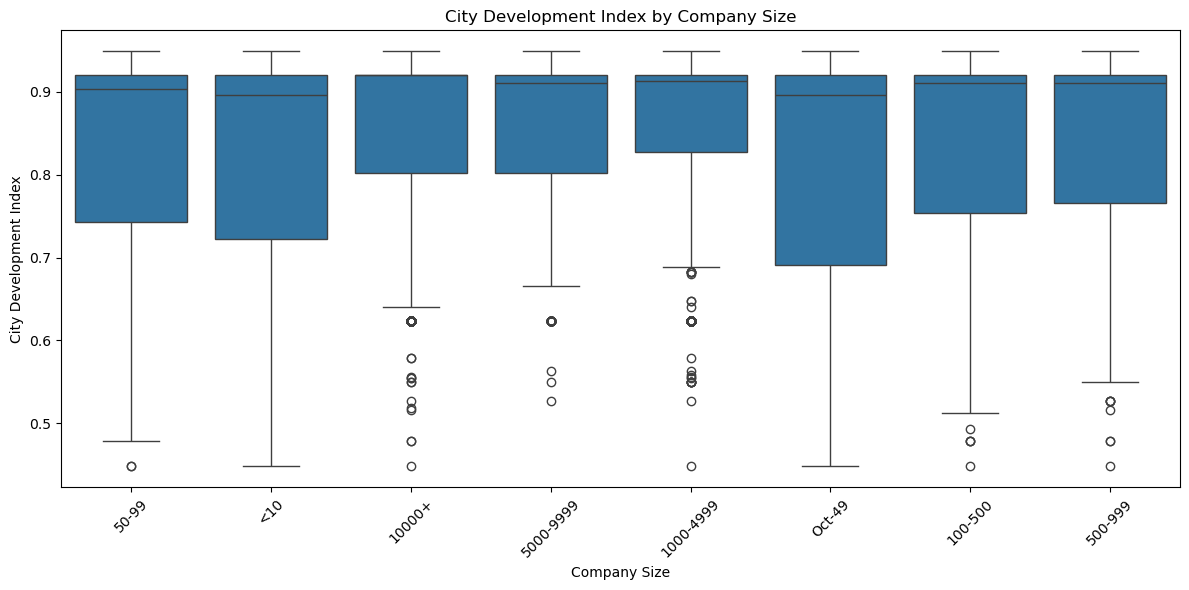

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_jobs, x='company_size', y='city_development_index')
plt.title('City Development Index by Company Size')
plt.xlabel('Company Size')
plt.ylabel('City Development Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3. Stacked Bar Chart:**

Explore the relationship between:

* education_level (X-axis)
* gender (stacked)

Visualize how gender is distributed across different education levels.

<Figure size 1200x600 with 0 Axes>

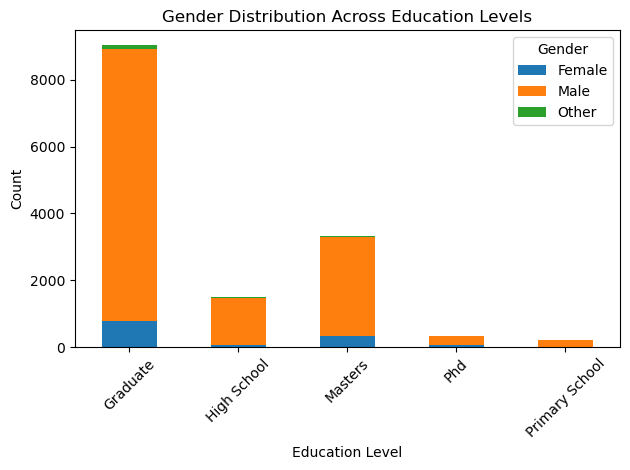

In [28]:
# Create a figure
plt.figure(figsize=(12, 6))

# Create a cross-tabulation of education_level and gender
education_gender = pd.crosstab(df_jobs['education_level'], df_jobs['gender'])

# Create stacked bar chart
education_gender.plot(kind='bar', stacked=True)

plt.title('Gender Distribution Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#**Correlation Analysis**


**1.** Calculate the correlation between the following pairs of variables:

* city_development_index and target
* experience and target
* training_hours and target

In [29]:
# Calculate correlations with target
correlations = {
    'city_development_index': df_jobs['city_development_index'].corr(df_jobs['target']),
    'experience': df_jobs['experience'].corr(df_jobs['target']),
    'training_hours': df_jobs['training_hours'].corr(df_jobs['target'])
}

# Print correlations with formatting
print("Correlations with target variable:")
for var, corr in correlations.items():
    print(f"{var}: {corr:.4f}")

Correlations with target variable:
city_development_index: -0.3417
experience: -0.1767
training_hours: -0.0216


**2.** Create a heatmap to visualize the correlation between these numerical columns:

* city_development_index
* training_hours
* experience
* target

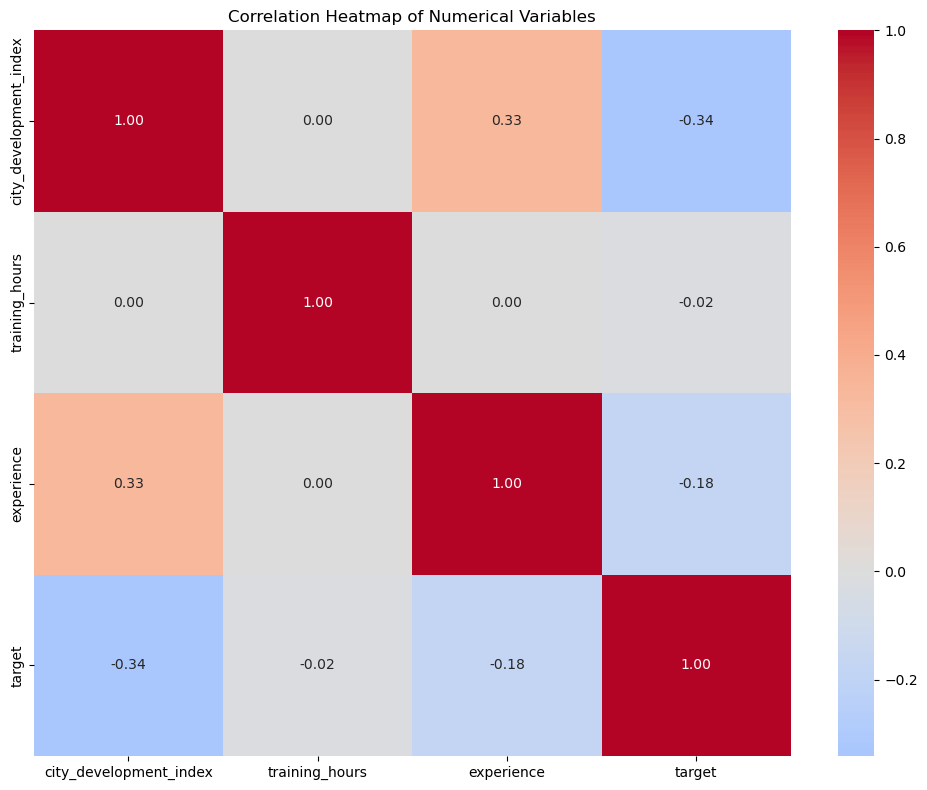

In [30]:
# Select numerical columns for correlation analysis
numerical_cols = ['city_development_index', 'training_hours', 'experience', 'target']

# Create correlation matrix
correlation_matrix = df_jobs[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

End of Assignment 2